### EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering

## Name : Y.L.A. Epa

## Index Number : 210156U



Question 1

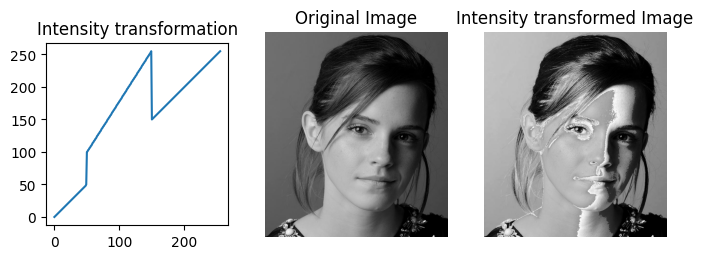

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


img = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(50,100,0)
t3 = np.linspace(100,255,100)
t4 = np.linspace(150,255,106)
t = np.concatenate((t1,t2,t3,t4),axis=0).astype(np.uint8)
assert len(t)==256

g = cv.LUT(img,t)
fig, ax = plt.subplots(1,3,figsize=(8,8))
ax[0].plot(t), ax[0].set_title("Intensity transformation"), ax[0].set_aspect('equal')
ax[1].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), ax[1].axis('off'), ax[1].set_title("Original Image")
ax[2].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[2].set_title("Intensity transformed Image")	
plt.show()


Question 2

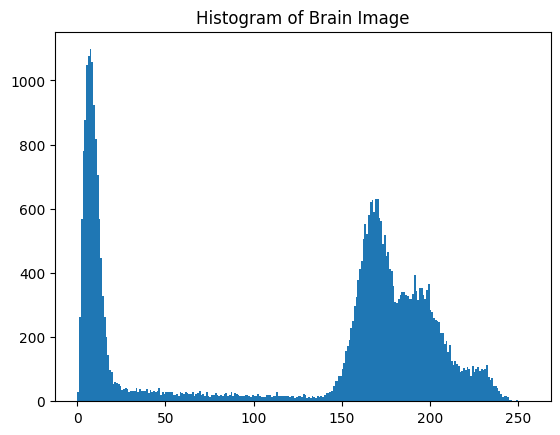

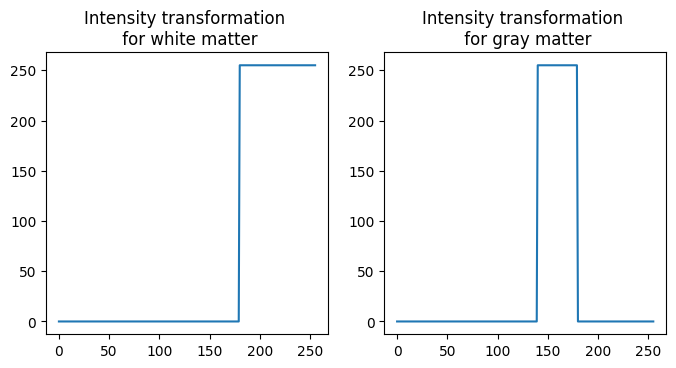

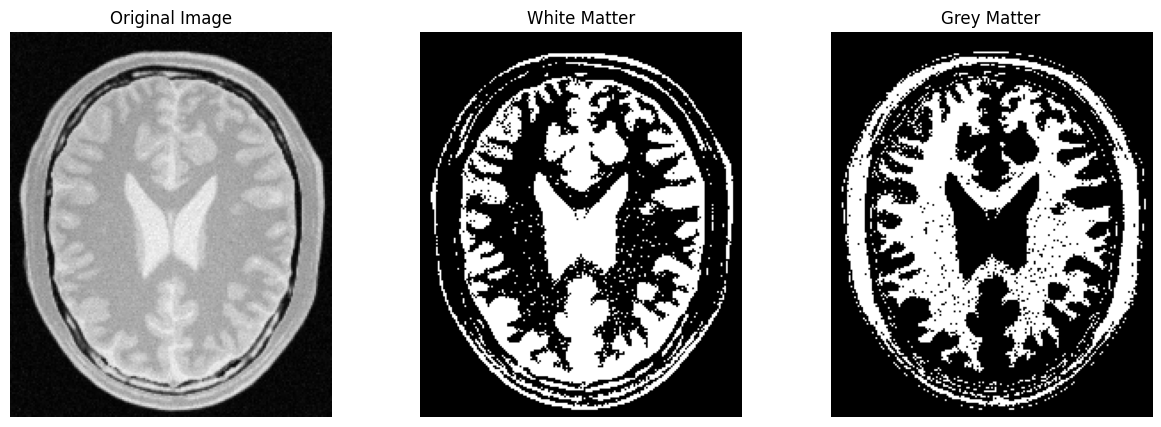

In [30]:
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt 
 
f = cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE) 
assert f is not None 

t1 = np.zeros(180) 
t2 = 255*np.ones(76) 
t = np.concatenate((t1,t2),axis=0).astype(np.uint8) 
assert len(t)==256 

s1 = np.zeros(140) 
s2 = 255*np.ones(40) 
s3 = np.zeros(76) 
s = np.concatenate((s1,s2,s3),axis=0).astype(np.uint8) 
assert len(s)==256 

g = cv.LUT(f,t) 
h = cv.LUT(f,s) 

plt.hist(f.ravel(), 256, [0, 256])
plt.title("Histogram of Brain Image")
plt.show()


fig, ax = plt.subplots(1,2,figsize=(8,8)) 
ax[0].plot(t), ax[0].set_aspect('equal'), ax[0].set_title("Intensity transformation \n for white matter")
ax[1].plot(s), ax[1].set_aspect('equal'), ax[1].set_title("Intensity transformation \n for gray matter")
plt.show()

plt.figure(figsize=(15, 5))
# Plot the results
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.title('White Matter')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(h,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.title('Grey Matter')
plt.show()



Question 3

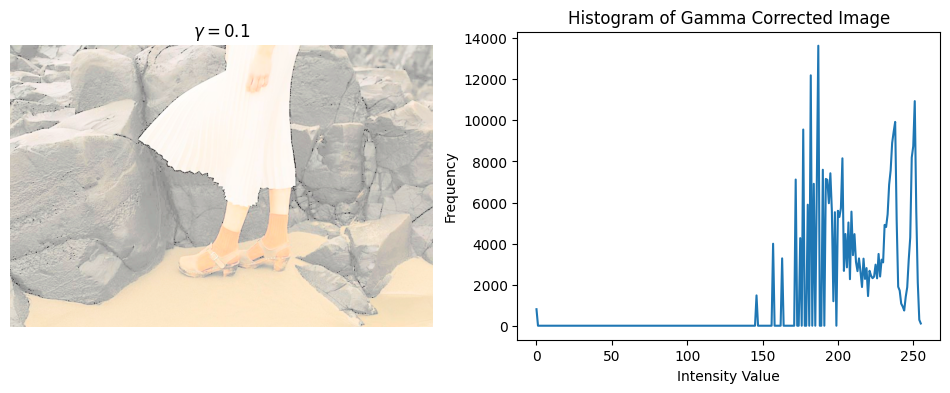

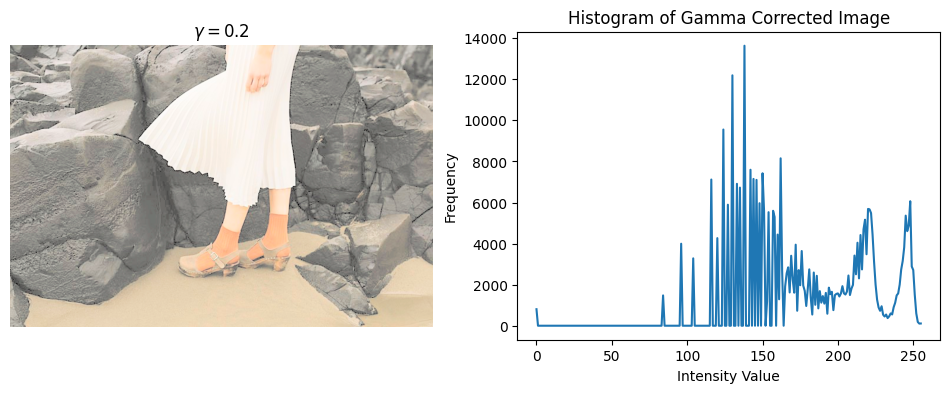

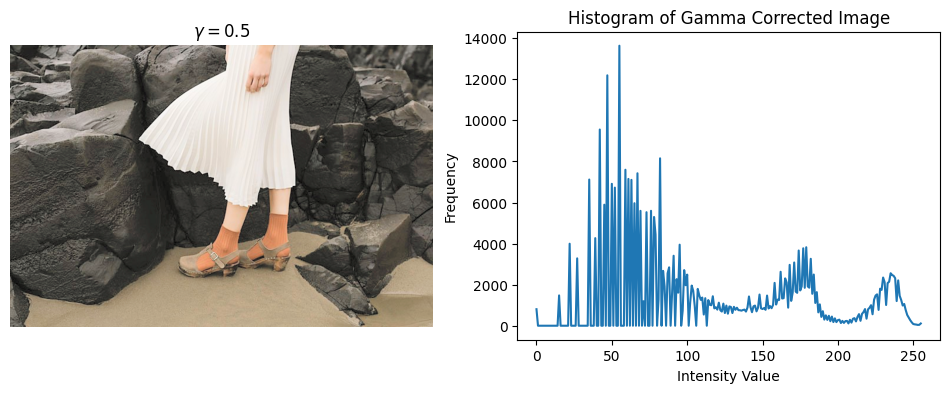

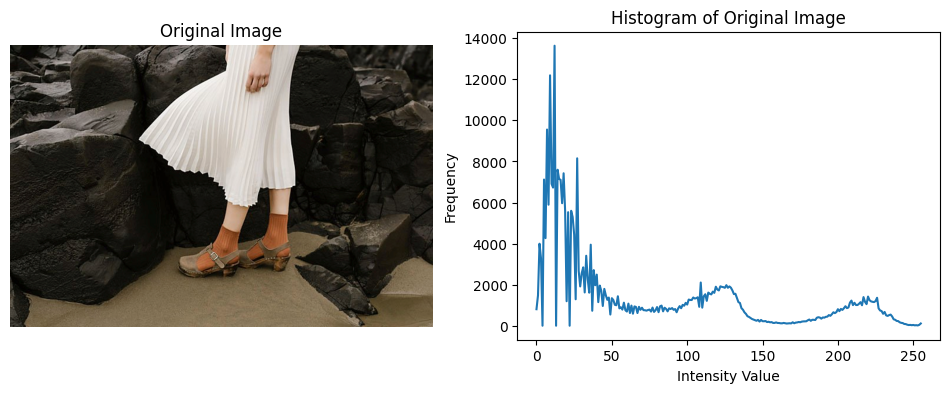

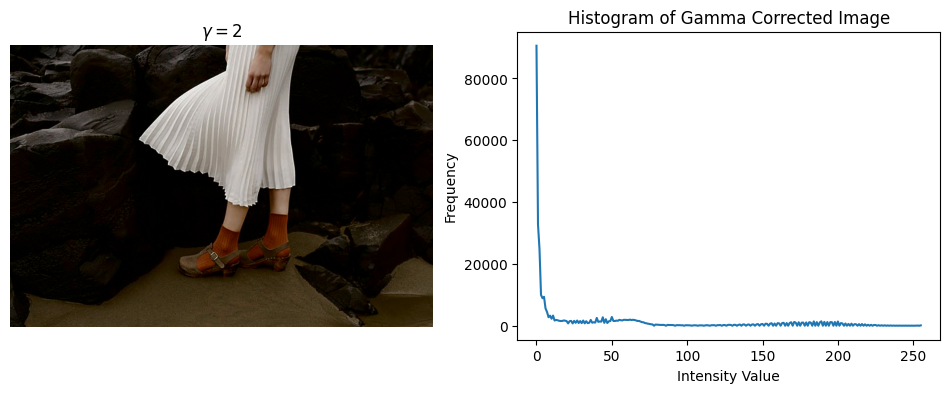

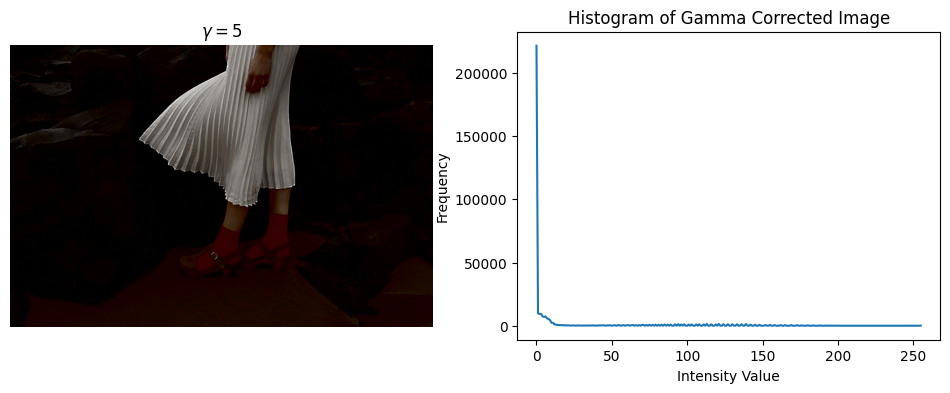

In [35]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

gammas = [0.1, 0.2, 0.5, 1, 2, 5]
img = cv.imread("highlights_and_shadows.jpg") 
L, a, b = cv.split(cv.cvtColor(img, cv.COLOR_BGR2LAB)) 

for i, gamma in enumerate(gammas):
    t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0,256)]).astype(np.uint8)
    g = cv.LUT(L, t)
    corrected_img = cv.merge([g, a, b]) 

    hist = cv.calcHist([corrected_img], [0], None, [256], [0, 256])
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].imshow(cv.cvtColor(corrected_img,cv.COLOR_LAB2RGB))
    if gamma==1:
        ax[0].set_title('Original Image')
    else:
        ax[0].set_title(r'$\gamma = {gamma}$'.format(gamma=gamma))
    ax[0].axis('off')
    ax[1].plot(hist)
    if gamma==1:
        ax[1].set_title('Histogram of Original Image')
    else:
        ax[1].set_title('Histogram of Gamma Corrected Image')
    ax[1].set_xlabel('Intensity Value')
    ax[1].set_ylabel('Frequency')
    plt.show()



0.1, 0.2, 0.5, 1, 2, 5 values are taken for gamma. When gamma is 1, the original image is the transformed image. When gamma value is decreasing, it increases the brighness of the image. When the gamma value is greater than 1 and increasing it reduces the brightness of the original image. Plotted histograms also show this. When images get darker, the histogram values moves to the left and when it gets light, the histogram moves to right.

Question 4

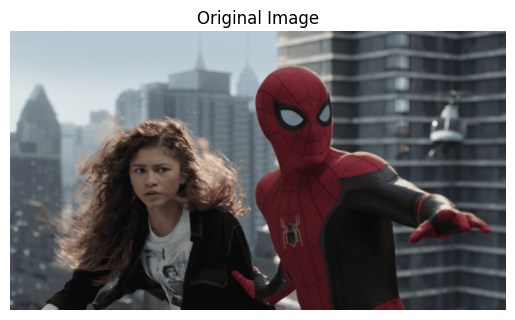

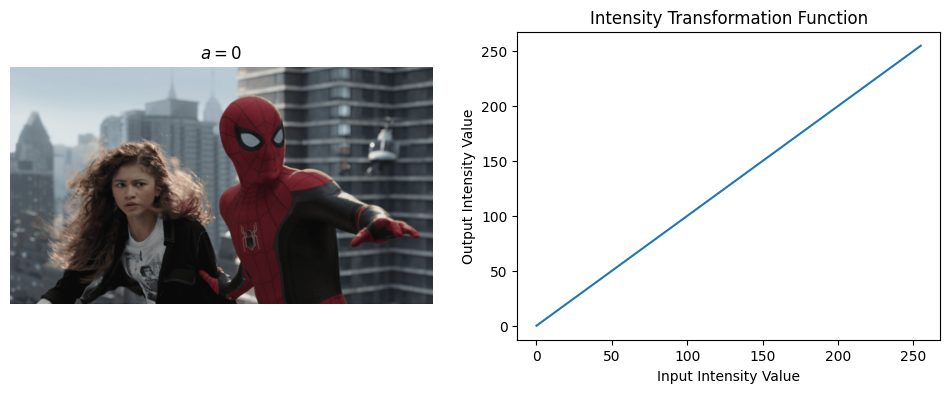

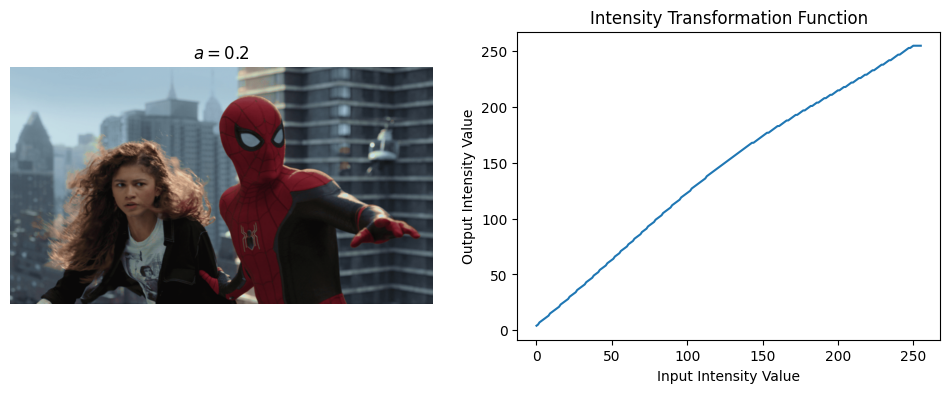

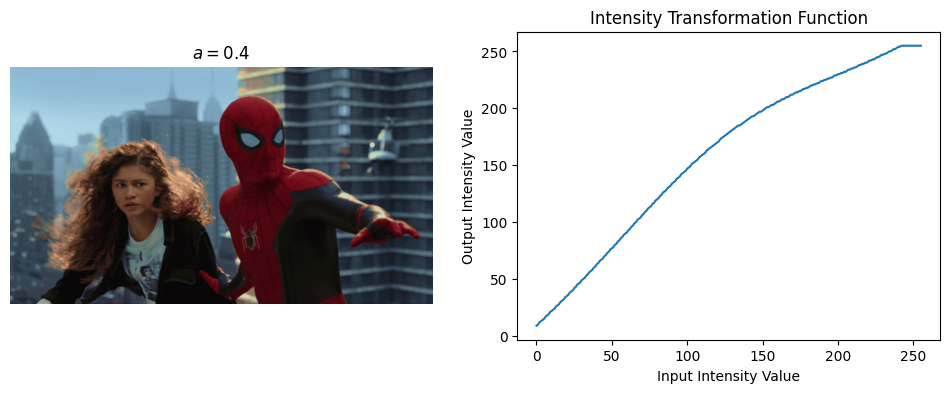

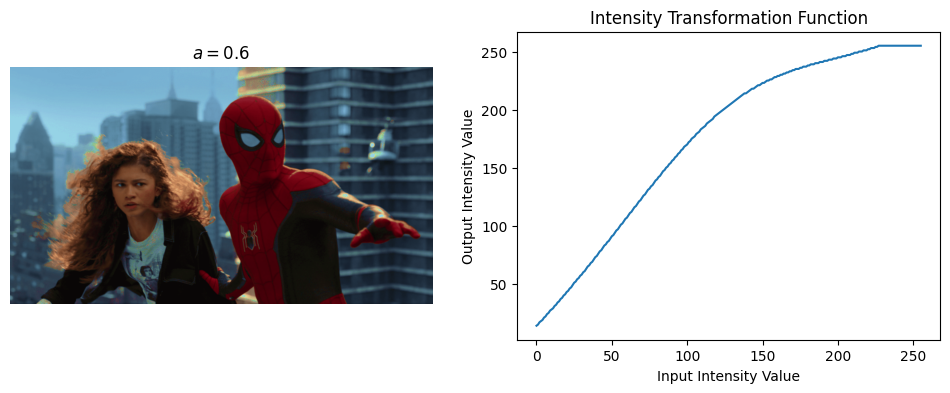

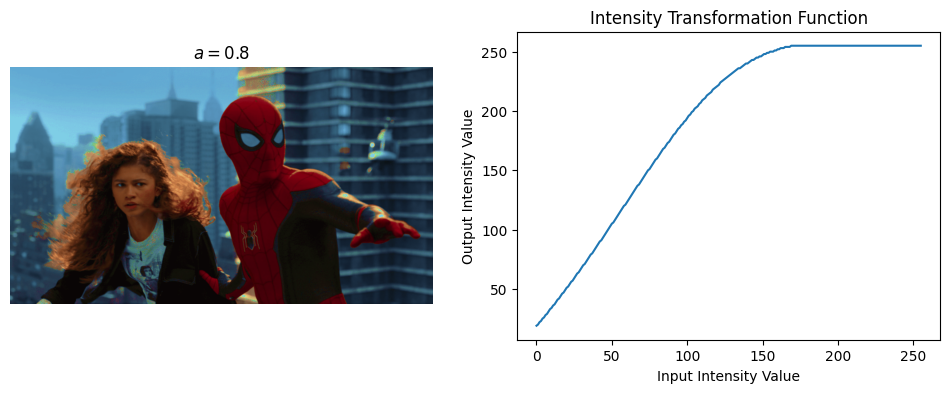

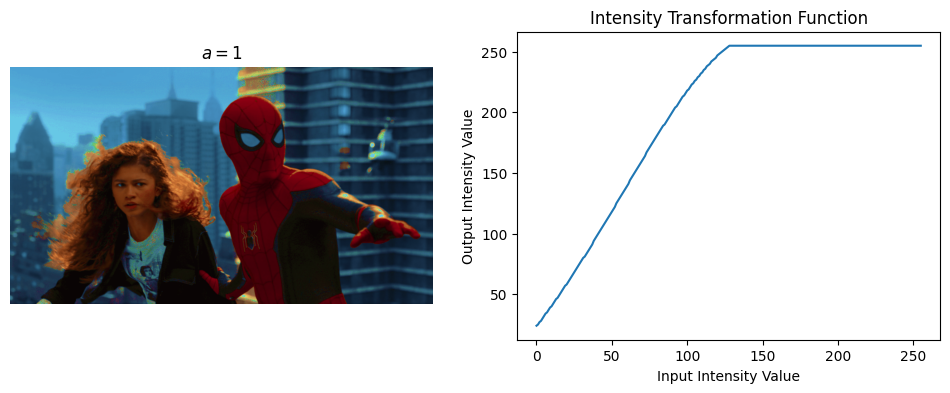

In [53]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("spider.png")
assert img is not None
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hue, saturation, value= cv.split(img_hsv) 

sigma = 70
a_list = [0,0.2,0.4,0.6,0.8,1]

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

for a in a_list:
    saturation_transformed = np.clip(saturation + a * 128 * np.exp(-((saturation - 128) ** 2) / (2 * sigma ** 2)), 0, 255).astype(np.uint8)
    vibrant_img = cv.merge([hue, saturation_transformed, value])
    vibrant_img = cv.cvtColor(vibrant_img, cv.COLOR_HSV2BGR)

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].imshow(cv.cvtColor(vibrant_img, cv.COLOR_BGR2RGB))
    ax[0].set_title(r'$a = {a}$'.format(a=a))
    ax[0].axis('off')

    x_values = np.arange(0, 256)
    y_values = np.clip(x_values + a * 128 * np.exp(-((x_values - 128) ** 2) / (2 * sigma ** 2)), 0, 255).astype(np.uint8)
    ax[1].plot(x_values, y_values)
    ax[1].set_title('Intensity Transformation Function')
    ax[1].set_xlabel('Input Intensity Value')
    ax[1].set_ylabel('Output Intensity Value')

    plt.show()

For a=0.6, we get a visually pleasing output.

Question 5

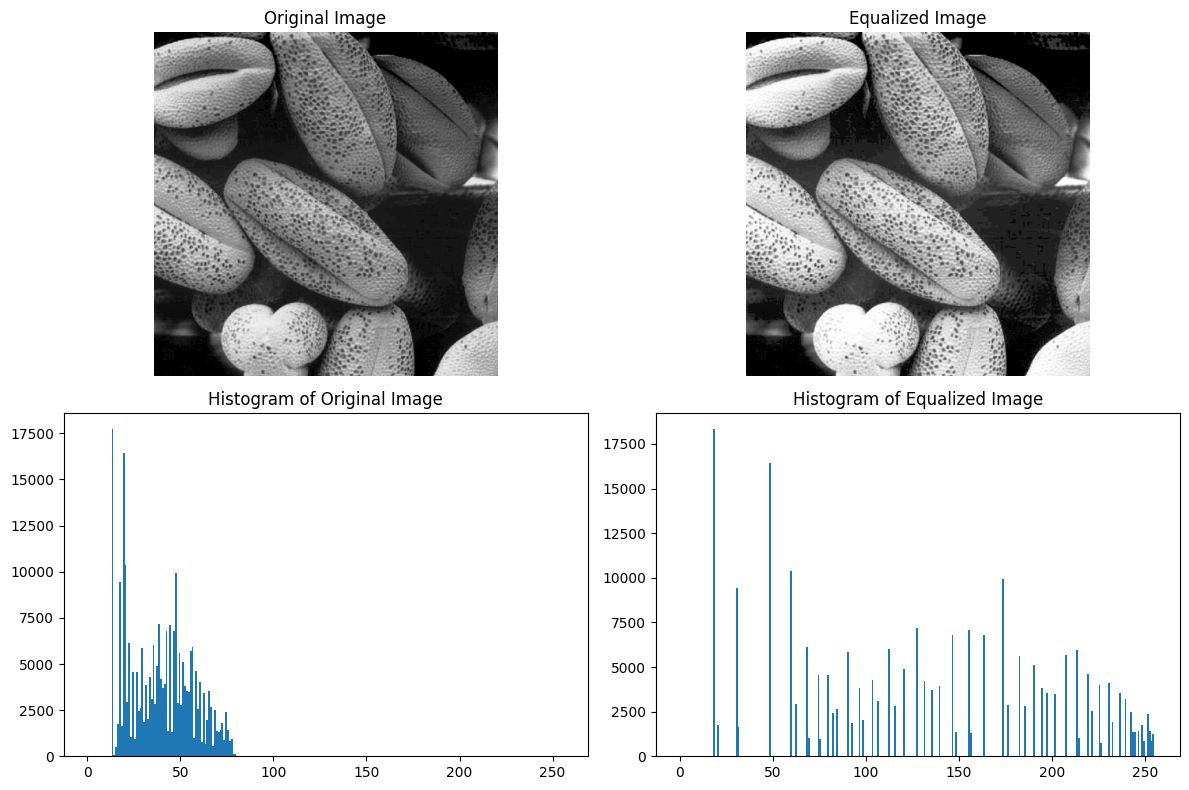

In [61]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("shells.tif")
assert img is not None

original_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

hist, bins = np.histogram(original_image.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * 255 / cdf[-1]
equalized_image = np.interp(original_image.flatten(), bins[:-1], cdf_normalized)
equalized_image = equalized_image.reshape(original_image.shape).astype(np.uint8)

 
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].imshow(original_image, cmap='gray')   
ax[0, 0].set_title("Original Image")
ax[0, 0].axis('off')

ax[0, 1].imshow(equalized_image, cmap='gray')   
ax[0, 1].set_title("Equalized Image")
ax[0, 1].axis('off')

ax[1, 0].hist(original_image.ravel(), bins=256, range=[0, 256]) # Histogram of Original Image
ax[1, 0].set_title("Histogram of Original Image")

ax[1, 1].hist(equalized_image.ravel(), bins=256, range=[0, 256]) # Histogram of Equalized Image
ax[1, 1].set_title("Histogram of Equalized Image")

plt.tight_layout()
plt.show()


Question 6